## Linear Regression

In [32]:
# Import dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import sklearn as skl
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [17]:
# Import Hg dataset
    # Arctic data removed
Hg_D = pd.read_csv('../Data/Hg_D2.csv')
Hg_D.head()

,Unnamed: 0,Hg0_pM,HgT_pM,DMHg_pM,MMHg_pM,PRES,TEMP,PSAL,DOXY,NITRAT,NITRIT,SILCAT,PHSPHT
0,0,0.00,0.49,0.01,0.19,20.0,17.630000,35.183333,255.766667,7.495,0.600,2.63,0.965
1,1,0.17,0.69,0.01,0.00,30.0,17.493333,35.193333,252.666667,7.780,0.620,2.10,1.050
2,2,0.09,0.51,0.00,0.07,45.0,17.293333,35.190000,247.133333,7.420,0.600,1.27,1.310
3,3,0.03,0.98,0.03,0.06,80.0,14.186667,34.956667,23.033333,17.740,3.140,21.42,2.635
4,4,0.07,0.44,0.10,0.09,236.0,12.230000,34.870000,6.266667,14.785,8.955,31.28,2.540


In [18]:
# Drop Unnamed column
Hg_D.drop(columns=['Unnamed: 0', 'Hg0_pM','HgT_pM','DMHg_pM','NITRIT','SILCAT','PHSPHT'], inplace=True)
Hg_D.head()

,MMHg_pM,PRES,TEMP,PSAL,DOXY,NITRAT
0,0.19,20.0,17.630000,35.183333,255.766667,7.495
1,0.00,30.0,17.493333,35.193333,252.666667,7.780
2,0.07,45.0,17.293333,35.190000,247.133333,7.420
3,0.06,80.0,14.186667,34.956667,23.033333,17.740
4,0.09,236.0,12.230000,34.870000,6.266667,14.785


In [24]:
Hg_D = Hg_D.dropna()

In [25]:
# Split our preprocessed data into our features and target arrays
X = Hg_D.drop(['MMHg_pM'], axis=1)
y = Hg_D['MMHg_pM']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [26]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
# Define the model
model = LinearRegression()
model.fit(X_train_scaled,y_train)

LinearRegression()

In [30]:
model.score(X_test_scaled,y_test)

0.04096692648191458

## KNN

In [37]:
Hg_D.head()

,MMHg_pM,PRES,TEMP,PSAL,DOXY,NITRAT
0,0.19,20.0,17.630000,35.183333,255.766667,7.495
1,0.00,30.0,17.493333,35.193333,252.666667,7.780
2,0.07,45.0,17.293333,35.190000,247.133333,7.420
3,0.06,80.0,14.186667,34.956667,23.033333,17.740
4,0.09,236.0,12.230000,34.870000,6.266667,14.785


In [38]:
# Bin MMHg data
bins = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]
group_names = [1,2,3,4,5,6,7,8,9,10]
Hg_D['MMHgBins']=pd.cut(Hg_D['MMHg_pM'],bins,labels=group_names,include_lowest=True)
Hg_D.head()

,MMHg_pM,PRES,TEMP,PSAL,DOXY,NITRAT,MMHgBins
0,0.19,20.0,17.630000,35.183333,255.766667,7.495,2
1,0.00,30.0,17.493333,35.193333,252.666667,7.780,1
2,0.07,45.0,17.293333,35.190000,247.133333,7.420,1
3,0.06,80.0,14.186667,34.956667,23.033333,17.740,1
4,0.09,236.0,12.230000,34.870000,6.266667,14.785,1


In [39]:
# Drop Unnamed column
Hg_D.drop(columns=['MMHg_pM'], inplace=True)
Hg_D.head()

,PRES,TEMP,PSAL,DOXY,NITRAT,MMHgBins
0,20.0,17.630000,35.183333,255.766667,7.495,2
1,30.0,17.493333,35.193333,252.666667,7.780,1
2,45.0,17.293333,35.190000,247.133333,7.420,1
3,80.0,14.186667,34.956667,23.033333,17.740,1
4,236.0,12.230000,34.870000,6.266667,14.785,1


In [41]:
# Split our preprocessed data into our features and target arrays
X = Hg_D.drop(['MMHgBins'], axis=1)
y = Hg_D['MMHgBins']

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [42]:
# Create scaler instance
X_scaler = skl.preprocessing.StandardScaler()

# Fit the scaler
X_scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.883
k: 3, Train/Test Score: 0.877/0.703
k: 5, Train/Test Score: 0.832/0.703
k: 7, Train/Test Score: 0.808/0.703
k: 9, Train/Test Score: 0.822/0.703
k: 11, Train/Test Score: 0.793/0.711
k: 13, Train/Test Score: 0.793/0.711
k: 15, Train/Test Score: 0.782/0.727
k: 17, Train/Test Score: 0.777/0.719
k: 19, Train/Test Score: 0.774/0.703


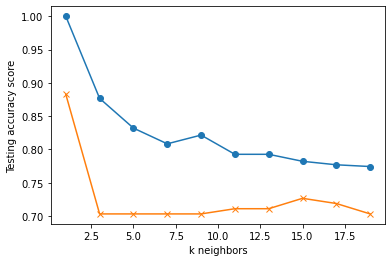

In [43]:
# Loop through different k values to find which has the highest accuracy.
# Note: We use only odd numbers because we don't want any ties.
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy score")
plt.show()

In [44]:
# Note that k: 11 seems to be the best choice for this dataset
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train_scaled, y_train)
print('k=13 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=13 Test Acc: 0.711


In [45]:
y_true = y_test
y_pred = knn.predict(X_test_scaled)

In [46]:
 confusion_matrix(y_true, y_pred)

array([[89,  2,  0,  0,  0],
       [24,  2,  0,  0,  0],
       [ 6,  2,  0,  0,  0],
       [ 2,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0]], dtype=int64)

In [47]:
 print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           1       0.73      0.98      0.84        91
           2       0.33      0.08      0.12        26
           3       0.00      0.00      0.00         8
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1

    accuracy                           0.71       128
   macro avg       0.21      0.21      0.19       128
weighted avg       0.59      0.71      0.62       128



C:\Users\Katli\.conda\envs\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Katli\.conda\envs\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Katli\.conda\envs\venv\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
